![example](images/director_shot.jpeg)

# Current Movie Trends Analysis for Microsoft Studios

**Authors:** Jonathan, Matt, Nate, Roshni
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

"This project analyzes multiple movie databases containing datapoints across thousands of movies. Descriptive analysis of budget, runtime, genre, and rating data shows that certain types of movies typically outperform others. Microsoft's new movie studio can use this analysis to guide movie production decisions. We found **x info about budget**, movies that have a rating of **x** and above typically have a runtime in the 85-110 min range, and documentaries to be the genre with the highest average review."

* **Which methods did we use?**

* **What are the recommendations?**

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

"Microsoft may be able to make an educated decision for deciding the criteria of their first film by using data from other movie releases. Doing so will give their movie the greatest likelihood of being a box office success.

Using data from IMDB, TheMovieDB, and The Numbers, we describe patterns across budget decisions, movie runtime and genre decisions, and movie ratings. We chose this data to highlight expected budget costs and movie genres for movies that have been voted as the highest rated by viewers."

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Data for this analysis is taken from 3 of the largest online movie databases with datapoints on hundreds of thousands of movies. Below, we further break down the sources and relevant information from each.

***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1: The MovieDB (TMDB)

TMDB dataset comprises of records on 26,517 movies and includes 9 columns of datapoints on each movie. The target data includes release date and genre where the genre codes are ordered by relevance.

In [2]:
df_tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col = 0, parse_dates=['release_date'])

In [3]:
df_tmdb.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


### 2: The Numbers (TN)

The Numbers (TN) dataset comprises of records on *5,782 movies, with 6 columns of datapoints on each movie. The target data includes production budget and worldwide gross revenue.*

In [4]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', parse_dates=['release_date'])

In [5]:
tn_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


### 3: IMDB

IMDB dataset comprises of multiple tables containing various information about movies. The two tables of interest are: `movie_basics` and `movie_ratings`.

The `movie_basics` table includes movie titles, release year, and genres. The `movie_ratings` table includes average movie rating and number of votes. The primary key for both tables is `movie_id`.

Target data include runtime minutes and average rating.

**NOTE:** In order to run this notebook, you will need to download the necessary data file. A zipped version of the file can be downloaded: [here](https://github.com/fetterollie/Microsoft-Movie-Analysis/raw/main/zippedData/im.db.zip).

1) Download the zipped file into a folder called 'zippedData' within the same folder that this notebook is located. Once this zip file is in located in the zippedData folder, you can run the following cell to unzip it.

In [6]:
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

2) Run the following cell to confirm that the database file has been downloaded and unzipped to the correct folder:

In [7]:
from os.path import exists
file_exists = exists('zippedData/im.db')
if file_exists:
    print("You have successfully downloaded and unzipped the database file.  Please proceed.")
else:
    print("The database file was not found.  Please ensure that the database file has been downloaded and unzipped into the 'zippedData' folder located in the folder that this Jupyter notebook resides.")

You have successfully downloaded and unzipped the database file.  Please proceed.


3) Next, we want to open up the database and examine the database tables.

In [8]:
import sqlite3

con = sqlite3.connect('zippedData/im.db')
query = """  SELECT * FROM sqlite_master  """
tables = pd.read_sql(query, con)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Viewing the tables of interest:

Movie basics Table:

In [9]:
query = """  SELECT * FROM movie_basics  """
movie_basics = pd.read_sql(query, con)
movie_basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


Movie Ratings Table:

In [10]:
query = """  SELECT * FROM movie_ratings  """
movie_ratings = pd.read_sql(query, con)
movie_ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


## Data Preparation

Using three sources of data for this analysis required multiple strategies for cleaning our data. Below, we discuss our process and reasoning for each set.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

### 1. The Movies Database
#### 1.1 Removing Unnecessary Columns & Filtering Data
**Columns to drop:**
- `popularity`
   - Popularity is based on current website popularity, not how well the movie performed when released or how it was reviewed
        - https://developers.themoviedb.org/3/getting-started/popularity
    
- `id`
    - Just a unique identifier, not relevant

- `original_title`
    - There are two columns for title, we will keep the final title column

The `df_cleaning` variable is created to store the dataframe after dropping the columns.

In [11]:
df_cleaning = df_tmdb.drop(['popularity', 'id', 'original_title'], axis=1)

**Columns to filter:**
- `original_language`
    - Microsoft would make the language in english as the company is based out of the USA
    
- `vote_Count`
    - Microsoft is only interested in a successful movie
    - It can be reasonably assumed that movies with fewer votes are less successful
    - We are dropping any count values below the mean
    
- `release_date`
    - Microsoft is interested in current data trends
        - We will limit the data to the last 10 years of available data (2010-2019)

The `df_filtered` variable is created to store the cleaned and filtered dataframe.

**Removing non-English language films.**

In [12]:
df_filtered = df_cleaning[df_cleaning['original_language'] == 'en']
df_filtered = df_filtered.drop('original_language', axis=1)

**Drop Certain Movies**

Dropping movies with a vote count below 200 votes.
(We chose this value as it is roughly the average of the number of votes in the dataset)

In [13]:
df_filtered['vote_count'].describe()

count    23291.000000
mean       209.307887
std       1016.214512
min          1.000000
25%          1.000000
50%          4.000000
75%         24.000000
max      22186.000000
Name: vote_count, dtype: float64

In [14]:
df_filtered = df_filtered[df_filtered['vote_count'] > 200]

Limiting the number of movies to those released in 2010 and after.

In [15]:
df_filtered = df_filtered[df_filtered['release_date'] > pd.Timestamp(2010, 1, 1)]

We are left with the table `df_filtered` that has 2318 rows and 5 columns of relevant information

#### 1.2 Converting the Data

**Making sense of the genre_ids**

We can see that the genre ID's are in order of best fit rather than numerical or alphabetical order
- For index 0: `genre_ids` = [12, 14, 10751]
- For index 1: `genre_ids` = [14, 12, 16, 10751]

We will take the primary `genre_ids` from the list to isolate the most relevant genre.

**Determining the data type for genre_ids**

Checking the type of data for genre_ids below. Goal is to create new columns with primary and secondary genres.

In [16]:
print(df_filtered['genre_ids'][0])
print(type(df_filtered['genre_ids'][0]))

[12, 14, 10751]
<class 'str'>


**Created a for-loop that runs through each row of the column** `genre_ids`

The data in `genre_ids` looks like a list, but is really a string including brackets. We are able to clean this with a for-loop.

The for-loop:
 - First converts the string to a list of int.
 - Then it takes each int and assigns it to a new list corresponding to it's position in the original `genre_ids` list.
 - If there is no value for that iteration, it populates the list with `None`.
 - I include nonetype so that they stay on point with the correct index.

In [17]:
char_remove = ["'", " ", "[", "]"]

first_genre = []

for x in df_filtered['genre_ids']:
    row = x
    for char in char_remove:
        row = row.replace(char, '')
    row = row.split(',')
    first_genre.append(row[0])

#### 1.3 Adding New Columns

**Now that we have a list of primary genre's we can turn it into a column.**

In [18]:
df_filtered['primary_genre'] = first_genre
df_filtered.head()

,genre_ids,release_date,title,vote_average,vote_count,primary_genre
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610,14
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368,12
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186,28
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,12


**Converting the genre_ids codes to something more understandable**

We found the below movie genre key on The MovieDB website. The key allows us to convert the `genre_ids` coding into standard English.

(found at: https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

In [19]:
backwards_key = {
'Action' : '28',
'Adventure' : '12',
'Animation' : '16',
'Comedy' : '35',
'Crime' : '80',
'Documentary' : '99',
'Drama' : '18',
'Family' : '10751',
'Fantasy' : '14',
'History' : '36',
'Horror' : '27',
'Music' : '10402',
'Mystery' : '9648',
'Romance' : '10749',
'Science Fiction' : '878',
'TV Movie' : '10770',
'Thriller' : '53',
'War' : '10752',
'Western' : '37'
}

genre_key = {v: k for k, v in backwards_key.items()}
# print(genre_key)

**Now to put the key to work and change the `primary_genre` column from numbers to English.**

In [20]:
df_filtered["primary_genre"].replace(genre_key, inplace=True)
df_filtered.head()

,genre_ids,release_date,title,vote_average,vote_count,primary_genre
0,"[12, 14, 10751]",2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
1,"[14, 12, 16, 10751]",2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
2,"[12, 28, 878]",2010-05-07,Iron Man 2,6.8,12368,Adventure
4,"[28, 878, 12]",2010-07-16,Inception,8.3,22186,Action
5,"[12, 14, 10751]",2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Adventure


**For the last step before analysis, we'll change the type of `primary_genre` to categorical information.**

In [21]:
df_filtered['primary_genre'] = df_filtered['primary_genre']#.astype('category')

### 2. The Numbers Database

#### 2.1 Removing Unnecessary Columns & Filtering Data

**Columns to drop:**
- `id`
    - Just a unique identifier, not relevant
- `domestic gross`
    - Since we're interested in appealing to an international market, worldwide gross is more relevant than domestic gross.

In [22]:
tn_df = tn_df.drop(['id', 'domestic_gross'], axis=1)

**Columns to filter:**
- `worldwide_gross`
    - As a large company looking for a box office hit, we want only movies that have a worldwide gross value
    - If the zero values indicate missing value, only 6.3% of the data is being dropped, within the 10% rule of thumb
- `release_date`
    - In line with The Movie Database, only current data (from 2010-2019) was included in this analysis.

#### Convert Strings of numbers in each column to Int type
First define a function and then clean each column

In [23]:
def clean_nums(column_title):
    '''
    Input a column title as a string to remove commas and dollar signs. Return the column as type int.
    '''
    if isinstance(tn_df[column_title][1], (int , np.integer)):
        return "Column values are already integers."
    else:
        tn_df[column_title].replace(',','', regex=True, inplace=True)
        tn_df[column_title] = tn_df[column_title].map(lambda x: int(x.replace('$','')))
        return tn_df

In [24]:
clean_nums('production_budget')
clean_nums('worldwide_gross')

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
5777,2018-12-31,Red 11,7000,0
5778,1999-04-02,Following,6000,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338
5780,2015-09-29,A Plague So Pleasant,1400,0


**Dropping movies with zero values for Worldwide Gross**

In [25]:
tn_df = tn_df[tn_df['worldwide_gross'] != 0]
tn_df.head()

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


**Filtering dataset to only include movies released between 2010-2019**

In [26]:
tn_df = tn_df[tn_df['release_date'] > pd.Timestamp(2010, 1, 1)]

This leaves us with 1922 rows and 4 columns of usable data

#### 2.2 Adding New Columns

#### Calculate Net Profit as a new variable in dataset
Net profit = worldwide gross - production budget

In [27]:
tn_df = tn_df.assign(net_profit = tn_df['worldwide_gross'] - tn_df['production_budget'])
tn_df.head()

,release_date,movie,production_budget,worldwide_gross,net_profit
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,1747311220


##### Convert numerical columns to be in millions for graph readability

In [28]:
tn_df['budget_mils'] = tn_df['production_budget'] / 1000000
tn_df['profit_mils'] = tn_df['net_profit']/1000000

##### Create Return on Investment (ROI) as a new variable.

- ROI (return on investment) evaluates the profitability of an investment relative to its cost.

- ROI = (profit - cost)/cost * 100%

In [29]:
tn_df['roi'] = tn_df['profit_mils']/tn_df['budget_mils']*100

tn_df

,release_date,movie,production_budget,worldwide_gross,net_profit,budget_mils,profit_mils,roi
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,410.600,635.063875,154.667286
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650,350.000,-200.237650,-57.210757
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963,330.600,1072.413963,324.384139
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747,317.000,999.721747,315.369636
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,1747311220,306.000,1747.311220,571.016739
...,...,...,...,...,...,...,...,...
5740,2010-10-15,Down Terrace,30000,9812,-20188,0.030,-0.020188,-67.293333
5744,2017-01-27,Emily,27000,3547,-23453,0.027,-0.023453,-86.862963
5748,2015-09-01,Exeter,25000,489792,464792,0.025,0.464792,1859.168000
5760,2010-04-02,Breaking Upwards,15000,115592,100592,0.015,0.100592,670.613333


### Joining The Movies Database with The Numbers Database

We decided to join the two databases so we could compare columns from each.

Prep The Movies Database to join:

In [30]:
df_tmdb_mod = df_filtered
df_tmdb_mod['movie'] = df_tmdb_mod['title']
df_tmdb_mod = df_tmdb_mod.set_index('movie')
df_tmdb_mod = df_tmdb_mod.drop('genre_ids', axis=1)
df_tmdb_mod.head(1)

,release_date,title,vote_average,vote_count,primary_genre
movie,,,,,
Harry Potter and the Deathly Hallows: Part 1,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure


Prep The Numbers Database to join:

In [31]:
df_tndb_mod = tn_df.set_index('movie')
df_tndb_mod = df_tndb_mod.drop('release_date', axis=1)
df_tndb_mod.head(1)

,production_budget,worldwide_gross,net_profit,budget_mils,profit_mils,roi
movie,,,,,,
Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,410.6,635.063875,154.667286


Executing the join:

In [32]:
df_tmdb_tn_innerjoin = df_tmdb_mod.join(df_tndb_mod, on='movie', how='inner', lsuffix='tmdb', rsuffix='tn')
df_tmdb_tn_innerjoin

,release_date,title,vote_average,vote_count,primary_genre,production_budget,worldwide_gross,net_profit,budget_mils,profit_mils,roi
movie,,,,,,,,,,,
How to Train Your Dragon,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,165000000,494870992,329870992,165.0,329.870992,199.921813
Iron Man 2,2010-05-07,Iron Man 2,6.8,12368,Adventure,170000000,621156389,451156389,170.0,451.156389,265.386111
Inception,2010-07-16,Inception,8.3,22186,Action,160000000,835524642,675524642,160.0,675.524642,422.202901
Percy Jackson & the Olympians: The Lightning Thief,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Adventure,95000000,223050874,128050874,95.0,128.050874,134.790394
Toy Story 3,2010-06-17,Toy Story 3,7.7,8340,Animation,200000000,1068879522,868879522,200.0,868.879522,434.439761
...,...,...,...,...,...,...,...,...,...,...,...
The 15:17 to Paris,2018-02-09,The 15:17 to Paris,5.3,799,Drama,30000000,56096200,26096200,30.0,26.096200,86.987333
Book Club,2018-05-18,Book Club,6.0,301,Comedy,10000000,91113683,81113683,10.0,81.113683,811.136830
Uncle Drew,2018-06-29,Uncle Drew,6.5,220,Comedy,18000000,46527161,28527161,18.0,28.527161,158.484228


### 3. IMDb
#### 1.1 Merging Tables

**We need to merge the `movie_ratings` table with the `movie_basics` table to get the full picture of our dataset.**

The `movies_with_ratings` variable is created to store the merged dataframe.

In [33]:
movies_with_ratings = pd.merge(movie_ratings, movie_basics, left_on='movie_id', right_on='movie_id')
movies_with_ratings.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


#### 1.2 Removing Unnecessary Columns & Filtering Data
**Columns to drop: original_title, genres**

In [34]:
movies_with_ratings_clean = movies_with_ratings.drop(['original_title', 'genres'], axis=1)
movies_with_ratings_clean.head()

,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes
0,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0
1,tt10384606,8.9,559,Borderless,2019,87.0
2,tt1042974,6.4,20,Just Inès,2010,90.0
3,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0
4,tt1060240,6.5,21,Até Onde?,2011,73.0


**Columns to filter:**
- `numvotes`
    - We only want to rely on the average rating in our analysis if a movie has a sufficient number of votes that went into that average rating.  
    - For this dataset, we are dropping any movies that have a vote count of less than the median (49).

Find the median number of votes in the remaining data set

In [35]:
median_votes = movies_with_ratings_clean['numvotes'].median()
median_votes

49.0

Drop movies with number of votes less than the median

In [36]:
movies_over_median_votes = movies_with_ratings_clean.loc[movies_with_ratings_clean['numvotes']>median_votes]
movies_over_median_votes.head()

,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes
1,tt10384606,8.9,559,Borderless,2019,87.0
3,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0
5,tt1069246,6.2,326,Habana Eva,2010,106.0
6,tt1094666,7.0,1613,The Hammer,2010,108.0
7,tt1130982,6.4,571,The Night Clerk,2011,104.0



We are now left with the dataset `movies_over_median_votes` that includes ~37K movies.

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### 1: The MovieDB (TMDB)

### 2: The Numbers (TN)

First, we used a scatter plot and Pearson's correlation to examine the relationship between production budget and global net profit.

#### Relationship between Production Budget and Global Net Profit

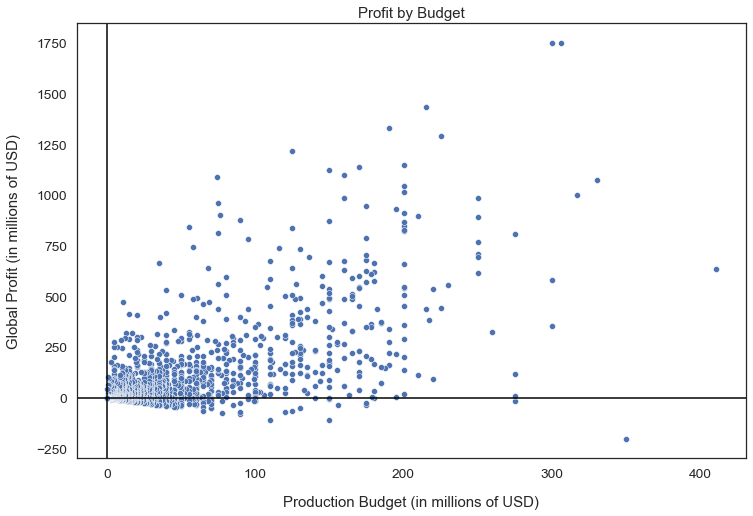

In [37]:
sns.set_theme(context='notebook', style='white', font='sans-serif', font_scale=1.25, color_codes=True, rc={'figure.figsize':(12,8)})

plot = sns.scatterplot(x='budget_mils', y='profit_mils', data=tn_df)
plt.axvline(0, color='black')
plt.axhline(0, color='black')

plot.set_title('Profit by Budget')
plot.set_xlabel('Production Budget (in millions of USD)', rotation=0, labelpad=15)
plot.set_ylabel('Global Profit (in millions of USD)', rotation=90, labelpad=15);

plt.show()

In [38]:
r_budget_profit = tn_df.corr()['production_budget']['net_profit']

print("r = " + str(round(r_budget_profit, 2)))

r = 0.67


- Our scatter plot and Pearson's correlation (r = 0.67) suggests a moderately strong relationship between production budget and profit. 


- From the scatterplot, we determined that high-budget films are high-risk, high-reward. While there is a general positive relationship between budget and profit, there is more variability among higher-budget films. 


- Since Microsoft wants to increase their likelihood of producing movies that are box office successes, this brought us to the question: is it worth the risk to invest in a few high-budget movies, or better to invest in many low-budget movies?

##### Budget-Profit Relationship in Low, Medium and High Budget Movies

- Economic researchers define "low" "medium" and "high" budget movies in Hollywood as the following (Kuehn & Lampe, 2021; https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3751648):
  - Low = 0 - 20 mil, 
  - Medium = 20 - 100 mil
  - High = 100+ mil
  
- Below, we group the dataset into "Low" "Medium" and "High" budget movies based on the above cutoffs:

In [39]:
labels = ["Low", "Medium", "High"]

tn_df['budget_groups'] = pd.cut(tn_df['budget_mils'], bins=[0,20,100,500],include_lowest=True, labels=labels)

tn_df

,release_date,movie,production_budget,worldwide_gross,net_profit,budget_mils,profit_mils,roi,budget_groups
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,410.600,635.063875,154.667286,High
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650,350.000,-200.237650,-57.210757,High
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963,330.600,1072.413963,324.384139,High
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747,317.000,999.721747,315.369636,High
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,1747311220,306.000,1747.311220,571.016739,High
...,...,...,...,...,...,...,...,...,...
5740,2010-10-15,Down Terrace,30000,9812,-20188,0.030,-0.020188,-67.293333,Low
5744,2017-01-27,Emily,27000,3547,-23453,0.027,-0.023453,-86.862963,Low
5748,2015-09-01,Exeter,25000,489792,464792,0.025,0.464792,1859.168000,Low
5760,2010-04-02,Breaking Upwards,15000,115592,100592,0.015,0.100592,670.613333,Low


Now, we investigate which budget group has the best ROI: Low, Medium, or High-budget films

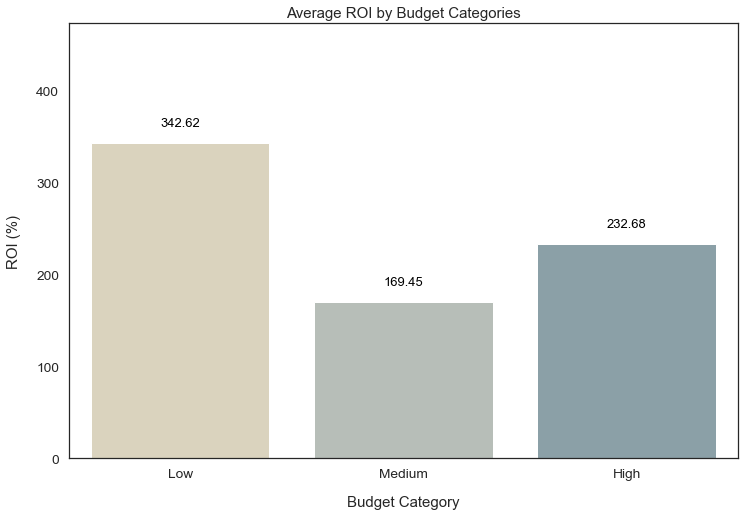

In [40]:
roi_bar = sns.barplot(x ='budget_groups', y = 'roi', data = tn_df, errwidth=0, saturation=.4, palette='blend:#EDA,#7AB')

ax = roi_bar

ax.set_xlabel("Budget Category", rotation=0, labelpad=15)
ax.set_ylabel("ROI (%)", rotation=90, labelpad=15)
ax.set_title('Average ROI by Budget Categories')

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                textcoords='offset points');

### TMDB & TNDB Joined

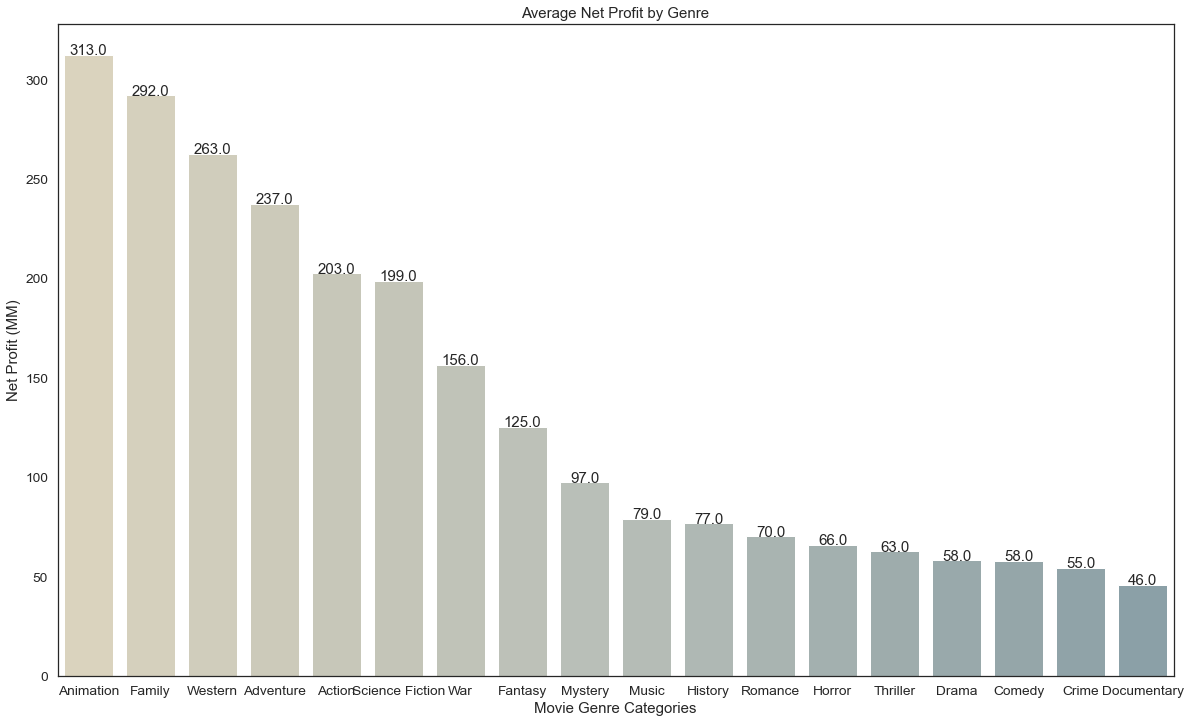

In [41]:
yjoin = df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values(by='profit_mils', ascending=False)
xjoin = list(df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values(by='profit_mils', ascending=False).index)
fig2, axj = plt.subplots(figsize=(20, 12))
#sns.set(style="whitegrid", color_codes=True)
sns.barplot(x=xjoin, y=yjoin['profit_mils'], saturation=.4, palette='blend:#EDA,#7AB')

axj.set_title('Average Net Profit by Genre')
axj.set_xlabel('Movie Genre Categories')
axj.set_ylabel('Net Profit (MM)')


for loc, label in enumerate((yjoin['profit_mils'])):
    axj.text(loc, label+.15, str(round(label, ndigits=0)), ha='center');

### 3. IMDb

#### Runtime minute analysis

We want to determine if there is a viewer preference between the number of runtime minutes for a movie and the average rating viewers give it.  As you can see from the cell below, we still have some movies that do not have runtime_minutes.  As such, we will drop those records.  

In [42]:
main_data = movies_over_median_votes
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36824 entries, 1 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         36824 non-null  object 
 1   averagerating    36824 non-null  float64
 2   numvotes         36824 non-null  int64  
 3   primary_title    36824 non-null  object 
 4   start_year       36824 non-null  int64  
 5   runtime_minutes  35367 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ MB


**Drop the movies with no runtime minutes**

In [43]:
# Drop movies with runtime_minutes of n/a
main_data_dropna = main_data.dropna(subset=['runtime_minutes'])
main_data_dropna.head()

,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes
1,tt10384606,8.9,559,Borderless,2019,87.0
3,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0
5,tt1069246,6.2,326,Habana Eva,2010,106.0
6,tt1094666,7.0,1613,The Hammer,2010,108.0
7,tt1130982,6.4,571,The Night Clerk,2011,104.0


Now that we have dropped the rows with n/a for runtime_minutes, we have a dataset of 35K movies remaining. 

For the next step, we are further narrowing down the dataset to only the highest rated movies (> 8.0) in order to see if those top rated movies mostly fall within a certain range of runtime minutes.  For this analysis, we are using a histogram.  

In [44]:
main_data_dropna_best_rated = main_data_dropna.loc[(main_data_dropna['averagerating'] >= 8.0) & (main_data_dropna['runtime_minutes'] < 250)]
main_data_dropna_best_rated

,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes
1,tt10384606,8.9,559,Borderless,2019,87.0
110,tt1537385,8.0,53,Annabelle & Bear,2010,100.0
193,tt1663202,8.0,621193,The Revenant,2015,156.0
225,tt1709657,8.1,75,Far Marfa,2013,86.0
258,tt1740117,8.7,60,Toryboy the Movie,2010,90.0
...,...,...,...,...,...,...
73775,tt8601284,8.1,54,Lada Kamenski,2018,71.0
73780,tt8718580,9.7,639,Eghantham,2018,125.0
73790,tt8907960,8.6,78,Naduve Antaravirali,2018,108.0
73792,tt8948790,9.0,1778,Jersey,2019,157.0


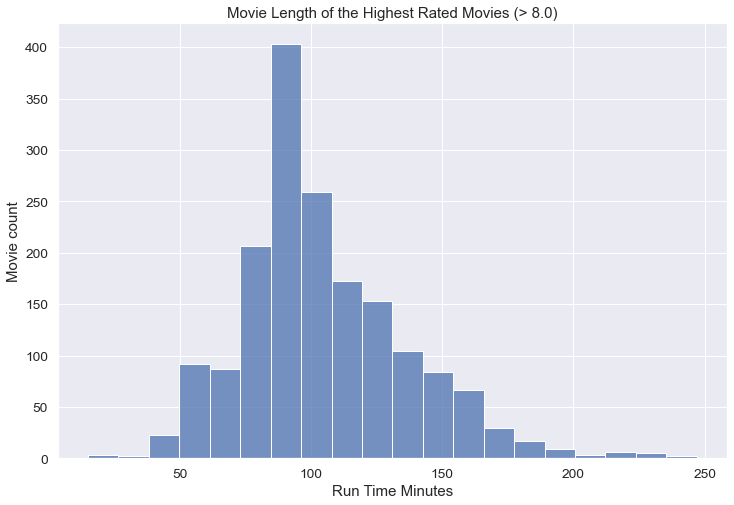

In [45]:
sns.set_style('darkgrid')
hist = sns.histplot(main_data_dropna_best_rated['runtime_minutes'], bins=20)
hist = hist.set(xlabel='Run Time Minutes', ylabel='Movie count', title='Movie Length of the Highest Rated Movies (> 8.0)')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

### 1: The MovieDB (TMDB)

### 2: The Numbers (TN)

### 3. IMDb

- As demonstrated in our histogram comparing movie length to movie rating, there were more higher rated movies in the 90-110 minute range than any other movie length.  This would indicate a viewer preference for movies with this length, and therefore we would recommend making movies with this length. 
- In the future, we could add to this analysis a comparison of gross revenue generated by each movie to movie length to see if movies of this length generate more dollars as well as higher ratings.